# Exploring the THREDDS catalog with Unidata's Siphon

Created: 2017-01-18

[Siphon](https://unidata.github.io/siphon/latest) is a Python module for accessing data hosted on a THREDDS data server.
Siphon works by parsing the catalog XML and exposing it with higher level functions.

In this notebook we will explore data available on the Central & Northern California Ocean Observing System (CeNCOOS) THREDDS. The cell below extracts the catalog information.

PS: There are many interesting examples at [https://unidata.github.io/siphon/latest/examples/index.html](https://unidata.github.io/siphon/latest/examples/index.html), be sure to check them out.

<div class="alert alert-danger">
  <strong>This notebook is stale and won't run due to missing data upstream and changes in the libraries used.</strong>
</div>

In [1]:
from siphon.catalog import TDSCatalog

catalog = TDSCatalog("https://thredds.cencoos.org/thredds/catalog.xml")


info = """
Catalog information
-------------------

Base THREDDS URL: {}
Catalog name: {}
Catalog URL: {}
Metadata: {}
""".format(
    catalog.base_tds_url, catalog.catalog_name, catalog.catalog_url, catalog.metadata
)

print(info)


Catalog information
-------------------

Base THREDDS URL: https://thredds.cencoos.org
Catalog name: CeNCOOS
Catalog URL: https://thredds.cencoos.org/thredds/catalog.xml
Metadata: {}



Unfortunately this catalog has no metadata. So let's check what kind of services are available.

In [2]:
for service in catalog.services:
    print(service.name)

all
allandsos
allandsosandfile
wms


And what datasets are there?

In [3]:
print("\n".join(catalog.datasets.keys()))

Global 1-km Sea Surface Temperature (G1SST)
High Resolution Chlorophyll-a concentration from MODIS/Aqua (1 Day Composite)
High Resolution Chlorophyll-a concentration from MODIS/Aqua (8 Day Composite)
High Resolution Chlorophyll-a concentration from MODIS/Aqua (1 Month Composite)
High Resolution Sea Surface Temperature from the Advanced Very-High Resolution Radiometer (1 Day Composite)
High Resolution Sea Surface Temperature from the Advanced Very-High Resolution Radiometer (8 Day Composite)
High Resolution Sea Surface Temperature from the Advanced Very-High Resolution Radiometer (1 Month Composite)
Ocean Surface Currents Monthly Averaged - CORDC High-Frequency Radar (US West Coast), 6 km
NOAA COOPS SFBOFS: regular grid
AIS Vessel Traffic Data - Continental US - US Coast Guard Terrestrial - Yearly Totals
AIS Vessel Traffic Data - Continental US - US Coast Guard Satellite - Monthly Totals
California Coastal Regional Ocean Modeling System (ROMS) 3km Nowcast
California Coastal Regional Oce

It looks like model runs as well as satellite and HFR data. One can also check the catalog refs for more information

In [4]:
print("\n".join(catalog.catalog_refs.keys()))

Global
Dynamic
Static
HF RADAR, US West Coast
HF RADAR, US West Coast (GNOME Format)


In [5]:
ref = catalog.catalog_refs["Global"]

[value for value in dir(ref) if not value.startswith("__")]

['follow', 'href', 'name', 'title']

In [6]:
info = """
Href: {}
Name: {}
Title: {}
""".format(
    ref.href, ref.name, ref.title
)

print(info)


Href: https://thredds.cencoos.org/thredds/global.xml
Name: 
Title: Global



The `follow` method navigates to that catalog `ref` and returns a new `siphon.catalog.TDSCatalog` object for that part of the THREDDS catalog.

In [7]:
cat = ref.follow()

print(type(cat))

<class 'siphon.catalog.TDSCatalog'>


That makes it easier to explore a small subset of the datasets available in the catalog.
Here are the data from the *Global* subset.

In [8]:
print("\n".join(cat.datasets.keys()))

NCEP Reanalysis Daily Averages Surface Flux
Global 1-km Sea Surface Temperature (G1SST)
OSTIA: Operational Sea Surface Temperature and Sea Ice Analysis
NCEP Global Forecast System Model (GFS)
NCEP 0.25-degree Global Forecast System v16 (2021) Wave
World Ocean Atlas (WOA) 2018 Statistical Averages - 1 degree
World Ocean Atlas (WOA) 2018 Statistical Averages - 1/4 degree
Aquarius V 3.0 Scatterometer Daily Aggregate
Aquarius V 3.0 Scatterometer Seven-Day Aggregate
Aquarius V 3.0 Scatterometer Monthly Aggregate
Aquarius V 3.0 Radiometer Daily Aggregate
Aquarius V 3.0 Radiometer Seven-Day Aggregate
Aquarius V 3.0 Radiometer Monthly Aggregate
Aquarius V 4.0 Scatterometer Daily Aggregate
Aquarius V 4.0 Scatterometer Seven-Day Aggregate
Aquarius V 4.0 Scatterometer Monthly Aggregate
Aquarius V 4.0 Radiometer Daily Aggregate
Aquarius V 4.0 Radiometer Seven-Day Aggregate
Aquarius V 4.0 Radiometer Monthly Aggregate


Let's extract the `Global 1-km Sea Surface Temperature` dataset from the global `ref`.

In [9]:
dataset = "Global 1-km Sea Surface Temperature (G1SST)"

ds = cat.datasets[dataset]

ds.name, ds.url_path

('Global 1-km Sea Surface Temperature (G1SST)', 'G1_SST_GLOBAL.nc')

Siphon has a `ncss` (NetCDF subset service) access, here is a quote from the documentation:

> This module contains code to support making data requests to
> the NetCDF subset service (NCSS) on a THREDDS Data Server (TDS). This includes
> forming proper queries as well as parsing the returned data.

Let's check if the catalog offers the `NetcdfSubset` in the `access_urls`.

In [10]:
for name, ds in catalog.datasets.items():
    if ds.access_urls:
        print(name)

High Resolution Chlorophyll-a concentration from MODIS/Aqua (1 Day Composite)
High Resolution Chlorophyll-a concentration from MODIS/Aqua (8 Day Composite)
High Resolution Chlorophyll-a concentration from MODIS/Aqua (1 Month Composite)
High Resolution Sea Surface Temperature from the Advanced Very-High Resolution Radiometer (1 Day Composite)
High Resolution Sea Surface Temperature from the Advanced Very-High Resolution Radiometer (8 Day Composite)
High Resolution Sea Surface Temperature from the Advanced Very-High Resolution Radiometer (1 Month Composite)
Ocean Surface Currents Monthly Averaged - CORDC High-Frequency Radar (US West Coast), 6 km
NOAA COOPS SFBOFS: regular grid
AIS Vessel Traffic Data - Continental US - US Coast Guard Terrestrial - Yearly Totals
AIS Vessel Traffic Data - Continental US - US Coast Guard Satellite - Monthly Totals
California Coastal Regional Ocean Modeling System (ROMS) 3km Nowcast
California Coastal Regional Ocean Modeling System (ROMS) 3km Forecast
Monte

All `access_urls` returned empty.... Maybe that is just a metadata issue because there is `NetcdfSubset` access when navigating in the webpage.

```python
from IPython.display import IFrame


url = "https://thredds.cencoos.org/thredds/catalog.html?dataset=G1_SST_US_WEST_COAST"
IFrame(url, width="100%", height=550)
```

![](2017-01-18-siphon-explore-thredds-iframe.png)

To finish the post let's check if there is any WMS service available and overlay the data in a slippy (interactive) map.

In [11]:
services = [service for service in catalog.services if service.name == "wms"]

services

Found only one, let's tease that out and check the URL.

In [12]:
service = services[0]

url = service.base
print(url)

https://data.axds.co/ncWMS/wms


OWSLib helps to inspect the available layers before plotting. Here we will get the first layer that has G1_SST_US_WEST_COAST on it.

Note, however, we are skipping the discovery step of the `wms` information and hard-coding it instead.
That is to save time because parsing the URL [http://pdx.axiomalaska.com/ncWMS/wms](http://pdx.axiomalaska.com/ncWMS/wms) takes ~ 10 minutes. See [this](https://github.com/ioos/notebooks_demos/pull/171#issuecomment-271705056) issue for more information.

In [13]:
from owslib.wms import WebMapService

if False:
    web_map_services = WebMapService(url)
    layer = [
        key for key in web_map_services.contents.keys() if "G1_SST_US_WEST_COAST" in key
    ][0]
    wms = web_map_services.contents[layer]

    title = wms.title
    lon = (wms.boundingBox[0] + wms.boundingBox[2]) / 2.0
    lat = (wms.boundingBox[1] + wms.boundingBox[3]) / 2.0
    time = wms.defaulttimeposition
else:
    layer = "G1_SST_US_WEST_COAST/analysed_sst"
    title = "Sea Surface Temperature"
    lon, lat = -122.50, 39.50
    time = "undefined"

In [14]:
import folium

m = folium.Map(location=[lat, lon], zoom_start=4)

folium.WmsTileLayer(
    name=f"{title} at {time}",
    url=url,
    layers=layer,
    fmt="image/png",
    transparent=True,
).add_to(m)

folium.LayerControl().add_to(m)

m

Last but not least a static image for the page thumbnail.

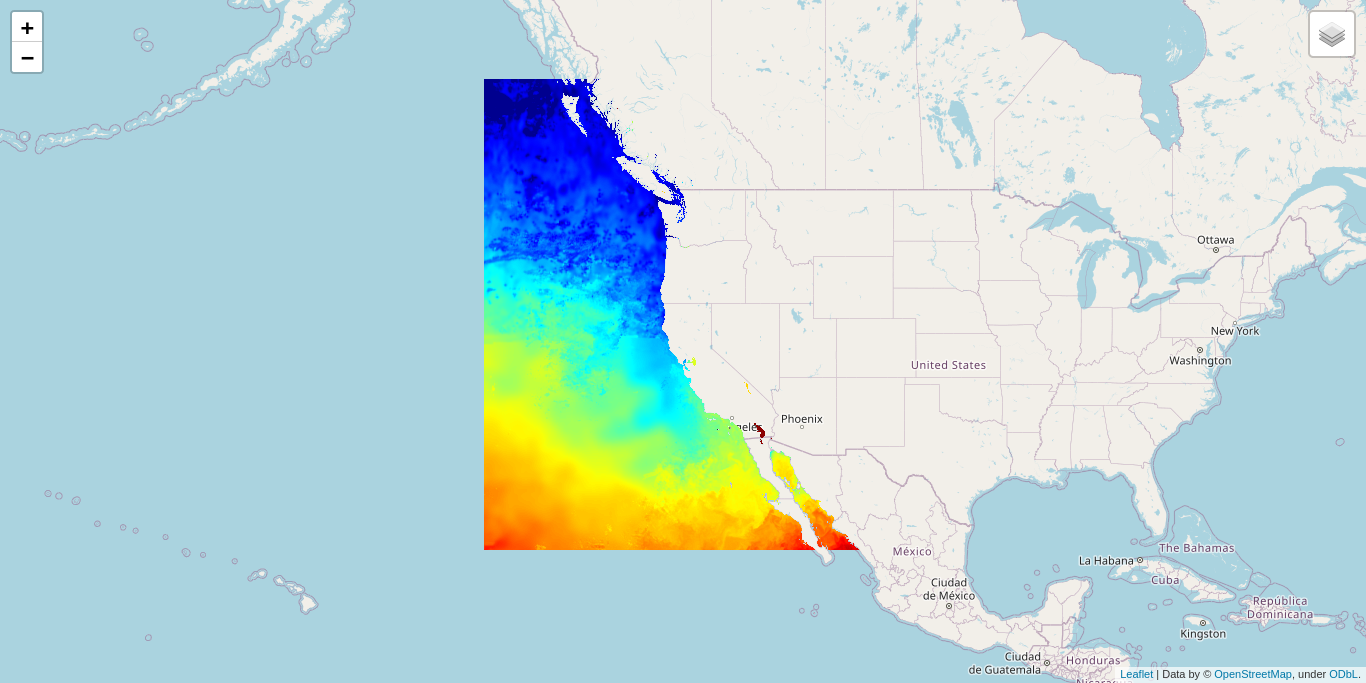

In [15]:
from IPython.display import Image

Image(m._to_png())